In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [26]:
grayImg = 'albert-einstein_gray.jpg'
colorImg = 'tulips.jpg'
affineWarped = 'affine-transformed image.jpg'
binary = 'binary.png'

I_gray = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)
I_affineWarped = cv2.imread(affineWarped, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colorImg)
I_BGRGray = cv2.imread(colorImg, cv2.IMREAD_GRAYSCALE)
I_Binary = cv2.imread(binary, cv2.IMREAD_GRAYSCALE)

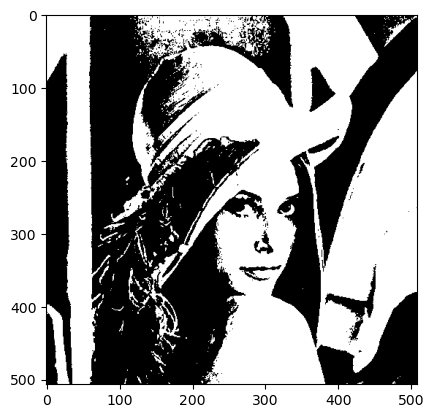

In [28]:
plt.imshow(I_Binary,cmap='gray');

In [29]:
np.unique(I_Binary)

array([  0, 255], dtype=uint8)

In [39]:
th = 140
im3 = I_Binary>th
im2 = I_gray>th

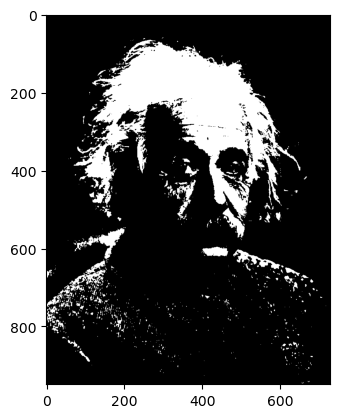

In [40]:
plt.imshow(im2,cmap='gray')

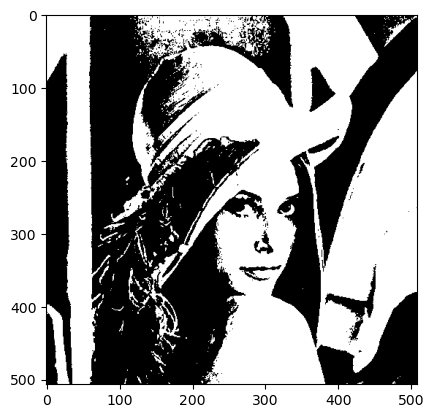

In [32]:
plt.imshow(im3, cmap='gray')

In [33]:
np.unique(im2)

array([False,  True])

In [34]:
np.unique(im3)

array([False,  True])

# Structuring Elements

In [49]:
k_rect = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
k_cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
k_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

In [52]:
k_rect

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [51]:
k_ellipse

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [50]:
k_cross

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Erosion

In [119]:
E_r = cv2.erode(I_Binary,k_rect)
E_e = cv2.erode(I_Binary,k_ellipse)
E_c = cv2.erode(I_Binary,k_cross)

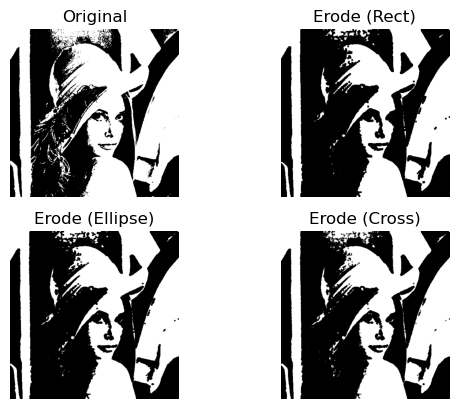

In [120]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(E_r, cmap='gray')
plt.title("Erode (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(E_e, cmap='gray')
plt.title("Erode (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(E_c, cmap='gray')
plt.title("Erode (Cross)")
plt.axis("off")
plt.show()

In [63]:
np.sum((E_r - E_e)**2)

3350

In [64]:
I_dif = (E_r - E_e)

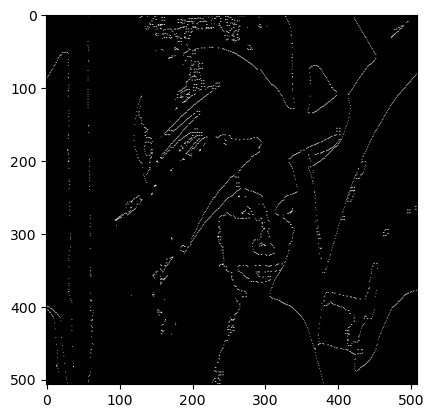

In [65]:
plt.imshow(I_dif,cmap='gray')

# Dialation

In [67]:
D_r = cv2.dilate(I_Binary,k_rect)
D_e = cv2.dilate(I_Binary,k_ellipse)
D_c = cv2.dilate(I_Binary,k_cross)

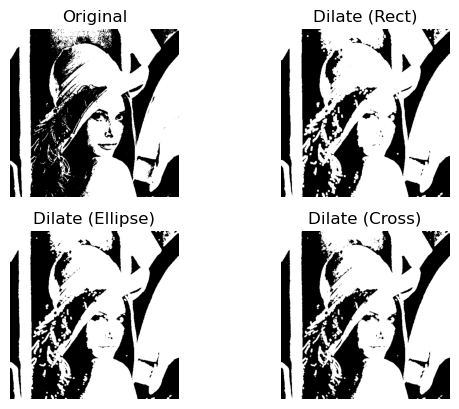

In [69]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(D_r, cmap='gray')
plt.title("Dilate (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(D_e, cmap='gray')
plt.title("Dilate (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(D_c, cmap='gray')
plt.title("Dilate (Cross)")
plt.axis("off")
plt.show()

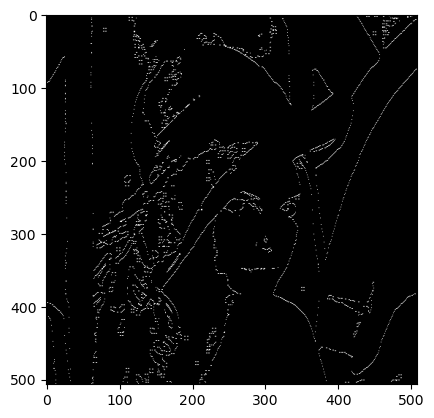

In [70]:
I_dif = (D_r - D_e)
plt.imshow(I_dif,cmap='gray')

# Opening (Erosion Followed by Dilation)

In [81]:
im_bool = np.array(I_Binary[:,:],dtype=bool)
N = np.random.rand(im_bool.shape[0],im_bool.shape[1])
N_binary = N>0.99

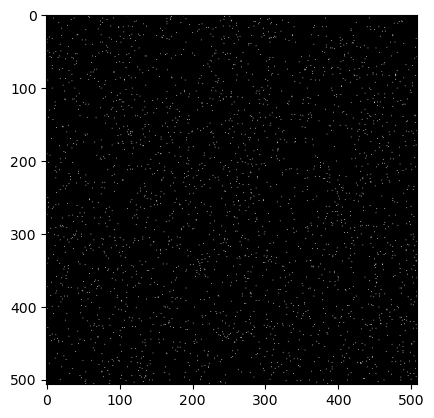

In [82]:
plt.imshow(N_binary,cmap='gray')

In [83]:
img_N = im_bool | N_binary

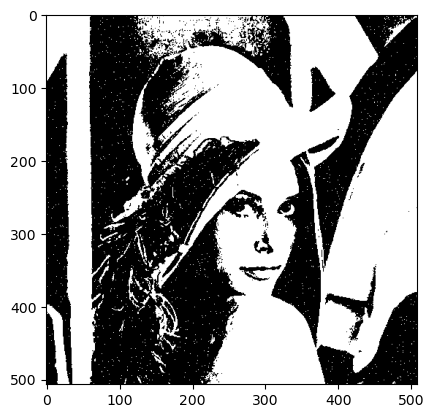

In [85]:
# Added noise
plt.imshow(img_N,cmap='gray')

In [87]:
O_r = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN,k_rect)
O_e = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN,k_ellipse)
O_c = cv2.morphologyEx(np.float32(img_N),cv2.MORPH_OPEN,k_cross)

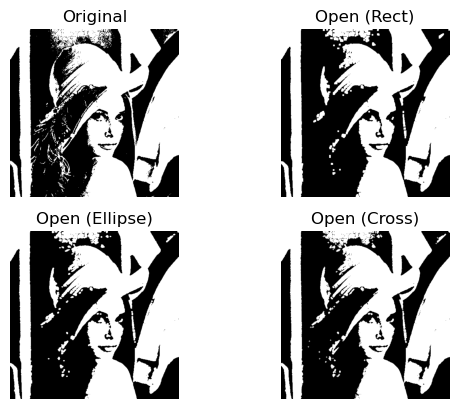

In [117]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(O_r, cmap='gray')
plt.title("Open (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(O_e, cmap='gray')
plt.title("Open (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(O_c, cmap='gray')
plt.title("Open (Cross)")
plt.axis("off")
plt.show()

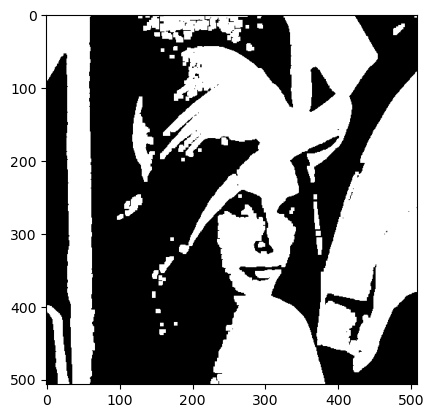

In [89]:
E_r = cv2.erode(np.float32(img_N),k_rect)
D_r = cv2.dilate(E_r,k_rect)
plt.imshow(D_r,cmap='gray')

# Closing (Dilation followed by Erosion)

In [90]:
im_bool = np.array(I_Binary[:,:],dtype=bool)
N = np.random.rand(im_bool.shape[0],im_bool.shape[1])
N_binary = N<0.99

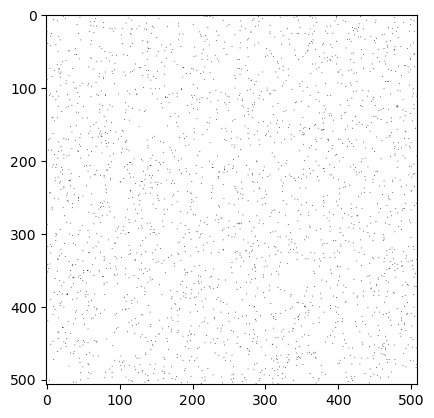

In [91]:
plt.imshow(N_binary,cmap='gray')

In [94]:
img_H = im_bool & N_binary

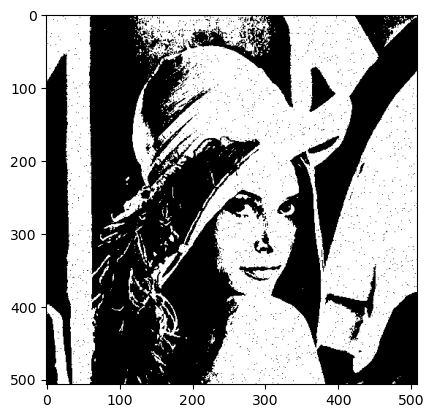

In [95]:
# Added noise
plt.imshow(img_H,cmap='gray')

In [106]:
C_r = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,k_rect)
C_e = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,k_ellipse)
C_c = cv2.morphologyEx(np.float32(img_H),cv2.MORPH_CLOSE,k_cross)

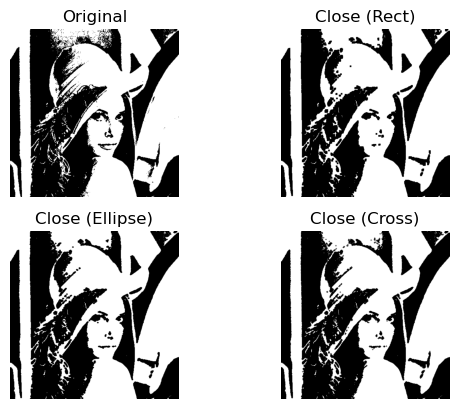

In [107]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(C_r, cmap='gray')
plt.title("Close (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(C_e, cmap='gray')
plt.title("Close (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(C_c, cmap='gray')
plt.title("Close (Cross)")
plt.axis("off")
plt.show()

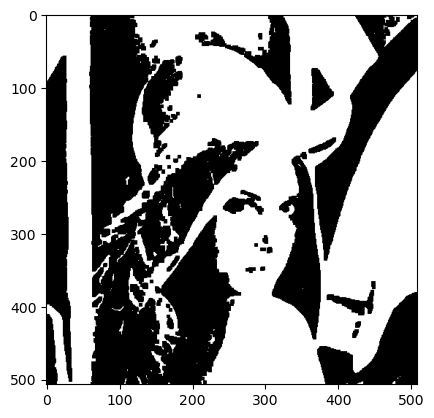

In [108]:
D_r = cv2.dilate(np.float32(img_H),k_rect)
E_r = cv2.erode(D_r,k_rect)
plt.imshow(E_r,cmap='gray')

# Gradient (Dilation - Erosion)

In [109]:
C_r = cv2.morphologyEx(I_Binary,cv2.MORPH_GRADIENT,k_rect)
C_e = cv2.morphologyEx(I_Binary,cv2.MORPH_GRADIENT,k_ellipse)
C_c = cv2.morphologyEx(I_Binary,cv2.MORPH_GRADIENT,k_cross)

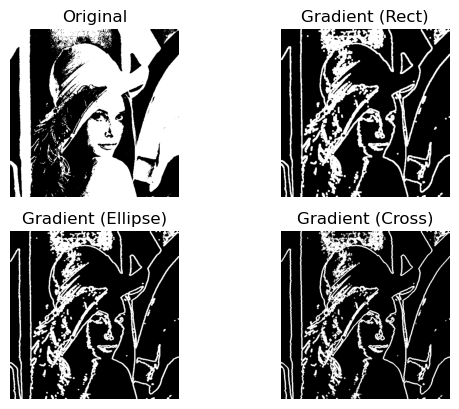

In [110]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(C_r, cmap='gray')
plt.title("Gradient (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(C_e, cmap='gray')
plt.title("Gradient (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(C_c, cmap='gray')
plt.title("Gradient (Cross)")
plt.axis("off")
plt.show()

# Top Hat (Input - Opening)
# Black Hat (Closing - Input)

In [112]:
TH_r = cv2.morphologyEx(I_Binary,cv2.MORPH_TOPHAT,k_rect)
TH_e = cv2.morphologyEx(I_Binary,cv2.MORPH_TOPHAT,k_ellipse)
TH_c = cv2.morphologyEx(I_Binary,cv2.MORPH_TOPHAT,k_cross)

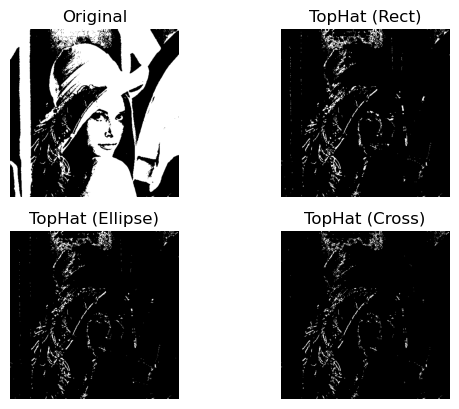

In [113]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(TH_r, cmap='gray')
plt.title("TopHat (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(TH_e, cmap='gray')
plt.title("TopHat (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(TH_c, cmap='gray')
plt.title("TopHat (Cross)")
plt.axis("off")
plt.show()

In [114]:
BH_r = cv2.morphologyEx(I_Binary,cv2.MORPH_BLACKHAT,k_rect)
BH_e = cv2.morphologyEx(I_Binary,cv2.MORPH_BLACKHAT,k_ellipse)
BH_c = cv2.morphologyEx(I_Binary,cv2.MORPH_BLACKHAT,k_cross)

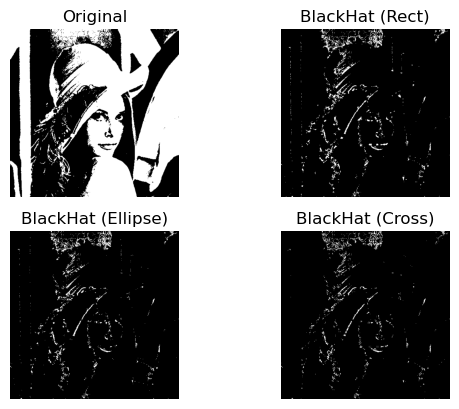

In [116]:
plt.subplot(221)
plt.imshow(I_Binary, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.subplot(222)
plt.imshow(BH_r, cmap='gray')
plt.title("BlackHat (Rect)")
plt.axis("off")
plt.subplot(223)
plt.imshow(BH_e, cmap='gray')
plt.title("BlackHat (Ellipse)")
plt.axis("off")
plt.subplot(224)
plt.imshow(BH_c, cmap='gray')
plt.title("BlackHat (Cross)")
plt.axis("off")
plt.show()